<center><font color='green' size= '6'> ⚡ ĐÁNH GIÁ XĂNG DẦU Ở VIỆT NAM</font></center>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## <font color = 'red'> 1. Đọc dữ liệu và đánh giá sơ bộ

### 1.1 Giá xăng dầu Việt Nam qua các năm

In [ ]:
# đọc dữ liệu giá xăng dầu ở Việt Nam
df = pd.read_csv('/content/drive/MyDrive/google_colab/PVoil_oilprice.csv')

In [ ]:
# thông tin ban đầu
display(df.head(5))
print(end="\n\n")
  # PVOIL INFO
print("THÔNG SỐ CƠ BẢN",end="\n\n")
df.info()

,Date,"Dầu DO 0,001S-V","Dầu DO 0,005S-IV","Dầu DO 0,05S-II",Dầu FO 3%S,"Dầu FO 3,5%S",Dầu KO,Xăng E5 RON 92-II,Xăng RON 95-III,Xăng RON 95-IV
0,2018-08-22,NaN,17730.0,17680.0,0.0,0.0,16260.0,19610.0,21170.0,21370.0
1,2018-09-06,NaN,18110.0,18060.0,0.0,0.0,16550.0,19910.0,21470.0,21670.0
2,2018-09-21,NaN,18170.0,18120.0,0.0,0.0,16680.0,20230.0,21770.0,21970.0
3,2018-10-06,NaN,18660.0,18610.0,0.0,0.0,17080.0,20900.0,22340.0,22540.0
4,2018-10-22,NaN,18660.0,18610.0,0.0,0.0,17080.0,20680.0,22200.0,22400.0




THÔNG SỐ CƠ BẢN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               229 non-null    object 
 1   Dầu DO 0,001S-V    38 non-null     float64
 2   Dầu DO 0,005S-IV   10 non-null     float64
 3   Dầu DO 0,05S-II    229 non-null    float64
 4   Dầu FO 3%S         32 non-null     float64
 5   Dầu FO 3,5%S       33 non-null     float64
 6   Dầu KO             229 non-null    float64
 7   Xăng E5 RON 92-II  229 non-null    float64
 8   Xăng RON 95-III    229 non-null    float64
 9   Xăng RON 95-IV     10 non-null     float64
dtypes: float64(9), object(1)
memory usage: 18.0+ KB


### 1.2 Kim ngạch xuất-nhập khẩu trên thế giới

In [ ]:
df_oil_trade = pd.read_csv('/content/drive/MyDrive/google_colab/Global Crude Petroleum Trade 1995-2021.csv')
display(df_oil_trade.head(5))
print(end="\n\n")
print(df_oil_trade.info())
print(end="\n\n")

,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021,Export
3,Africa,Cameroon,1.865465e+09,2021,Export
4,Africa,Democratic Republic of the Congo,5.815086e+08,2021,Export




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    7925 non-null   object 
 1   Country      7925 non-null   object 
 2   Trade Value  7925 non-null   float64
 3   Year         7925 non-null   int64  
 4   Action       7925 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 309.7+ KB
None




### ♦ Thay đổi data type

#### Bảng 'Giá xăng dầu Việt Nam'

In [ ]:
# thay đổi Dtype
df['Date'] = df['Date'].astype('datetime64[ns]')
print(df.info(),end='\n\n')
# thông tin xăng dầu
print('Thông tin về xăng dầu:')
print(display(df.describe()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               229 non-null    datetime64[ns]
 1   Dầu DO 0,001S-V    38 non-null     float64       
 2   Dầu DO 0,005S-IV   10 non-null     float64       
 3   Dầu DO 0,05S-II    229 non-null    float64       
 4   Dầu FO 3%S         32 non-null     float64       
 5   Dầu FO 3,5%S       33 non-null     float64       
 6   Dầu KO             229 non-null    float64       
 7   Xăng E5 RON 92-II  229 non-null    float64       
 8   Xăng RON 95-III    229 non-null    float64       
 9   Xăng RON 95-IV     10 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 18.0 KB
None

Thông tin về xăng dầu:


,Date,"Dầu DO 0,001S-V","Dầu DO 0,005S-IV","Dầu DO 0,05S-II",Dầu FO 3%S,"Dầu FO 3,5%S",Dầu KO,Xăng E5 RON 92-II,Xăng RON 95-III,Xăng RON 95-IV
count,229,38.000000,10.000000,229.000000,32.0,33.000000,229.000000,229.000000,229.000000,10.000000
mean,2022-08-13 21:10:13.100436736,18598.947368,17490.000000,18647.248908,0.0,531.212121,18188.820961,20624.410480,21596.375546,20617.000000
min,2018-08-22 00:00:00,17430.000000,14950.000000,9850.000000,0.0,0.000000,7880.000000,10940.000000,11630.000000,17800.000000
25%,2020-12-26 00:00:00,18000.000000,16645.000000,16580.000000,0.0,0.000000,15580.000000,19250.000000,20120.000000,19030.000000
50%,2022-12-12 00:00:00,18585.000000,17920.000000,18570.000000,0.0,0.000000,18720.000000,20490.000000,21440.000000,21315.000000
75%,2024-05-09 00:00:00,19092.500000,18485.000000,20700.000000,0.0,0.000000,20780.000000,22420.000000,23400.000000,21895.000000
max,2025-06-12 00:00:00,20430.000000,18660.000000,30010.000000,0.0,17530.000000,28780.000000,31300.000000,32870.000000,22540.000000
std,NaN,697.543138,1283.640656,3738.417297,0.0,3051.581309,4121.687709,3416.434638,3500.925875,1763.393509


None


<font size='4'>✅ Qua đánh giá thầy được rằng các mặt hàng giá trị bị mất nhiều là do thông tin trên trang website của PVoil không có (có thể không bán mặt hàng đó tại thời điểm thống kê, do nhu cầu trong nước không có nên không nhập khẩu,...)

<font size='4'>-> Chỉ phân tích dựa trên các mặt hàng mất ít giá trị hoặc không mất giá trị:

  <font size='4'>▶ Xăng E5 RON 92-II, Xăng RON 95-III, Dầu KO, Dầu DO 0,05S-II.


In [ ]:
oil_column_name = ['Xăng E5 RON 92-II', 'Xăng RON 95-III', 'Dầu KO', 'Dầu DO 0,05S-II']
print('Oil describe')
display(df[oil_column_name].describe())
print(end='\n\n')
# các giá trị thống kê của từng loại xăng dầu
oil_value = {}
for i, a in enumerate(oil_column_name):
  oil_value[a] = {'min': df[a].min(), 'max': df[a].max(), 'mean': df[a].mean(),
                  'median': df[a].median()}
oil_value = pd.DataFrame(oil_value)
print('Thống kế giá xăng (VNĐ)')
display(oil_value)

Oil describe


,Xăng E5 RON 92-II,Xăng RON 95-III,Dầu KO,"Dầu DO 0,05S-II"
count,229.000000,229.000000,229.000000,229.000000
mean,20624.410480,21596.375546,18188.820961,18647.248908
std,3416.434638,3500.925875,4121.687709,3738.417297
min,10940.000000,11630.000000,7880.000000,9850.000000
25%,19250.000000,20120.000000,15580.000000,16580.000000
50%,20490.000000,21440.000000,18720.000000,18570.000000
75%,22420.000000,23400.000000,20780.000000,20700.000000
max,31300.000000,32870.000000,28780.000000,30010.000000




Thống kế giá xăng (VNĐ)


,Xăng E5 RON 92-II,Xăng RON 95-III,Dầu KO,"Dầu DO 0,05S-II"
min,10940.00000,11630.000000,7880.000000,9850.000000
max,31300.00000,32870.000000,28780.000000,30010.000000
mean,20624.41048,21596.375546,18188.820961,18647.248908
median,20490.00000,21440.000000,18720.000000,18570.000000


#### Bảng 'Kim ngạch xuất-nhập khẩu trên thế giới'

In [ ]:
df_oil_trade[['Continent','Country']] = df_oil_trade[['Continent','Country']].astype('string')
df_oil_trade['Action'] = df_oil_trade['Action'].astype('category')
df_oil_trade['Year'] = pd.to_datetime(df_oil_trade['Year'], format='%Y')
df_oil_trade.info()
print(end='\n\n')
display(df_oil_trade.head(10))
print(end='\n\n')
df_oil_trade.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Continent    7925 non-null   string        
 1   Country      7925 non-null   string        
 2   Trade Value  7925 non-null   float64       
 3   Year         7925 non-null   datetime64[ns]
 4   Action       7925 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), string(2)
memory usage: 255.6 KB




,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021-01-01,Export
1,Africa,Botswana,2.055000e+03,2021-01-01,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021-01-01,Export
3,Africa,Cameroon,1.865465e+09,2021-01-01,Export
4,Africa,Democratic Republic of the Congo,5.815086e+08,2021-01-01,Export
5,Africa,Republic of the Congo,1.713917e+09,2021-01-01,Export
6,Africa,Algeria,1.069584e+10,2021-01-01,Export
7,Africa,Egypt,3.686004e+09,2021-01-01,Export
8,Africa,Gabon,3.606495e+09,2021-01-01,Export
9,Africa,Ghana,3.571527e+09,2021-01-01,Export


,Trade Value,Year
count,7.925000e+03,7925
mean,5.365169e+09,2008-08-03 13:23:40.466876928
min,1.000000e+00,1995-01-01 00:00:00
25%,1.416080e+05,2002-01-01 00:00:00
50%,8.549274e+07,2009-01-01 00:00:00
75%,1.828030e+09,2015-01-01 00:00:00
max,3.283380e+11,2021-01-01 00:00:00
std,1.940226e+10,NaN


## <font color = 'red'> 2. Biểu đồ phân bố giá xăng

### 2.1 Biểu đồ biến động giá xăng dầu theo thời gian

Text(0.5, 0.98, 'Biểu đồ biến động giá xăng dầu')

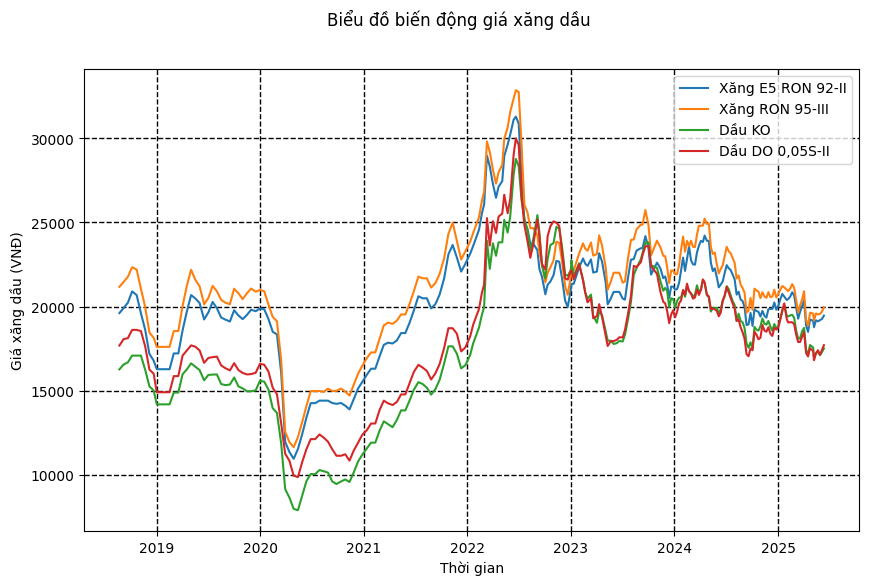

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df[oil_column_name])
plt.legend(oil_column_name)
plt.xlabel('Thời gian')
plt.ylabel('Giá xăng dầu (VNĐ)')
plt.grid(color = 'black', linestyle = '--', linewidth = 1)
plt.suptitle('Biểu đồ biến động giá xăng dầu')

### 2.2 Phân bố giá xăng

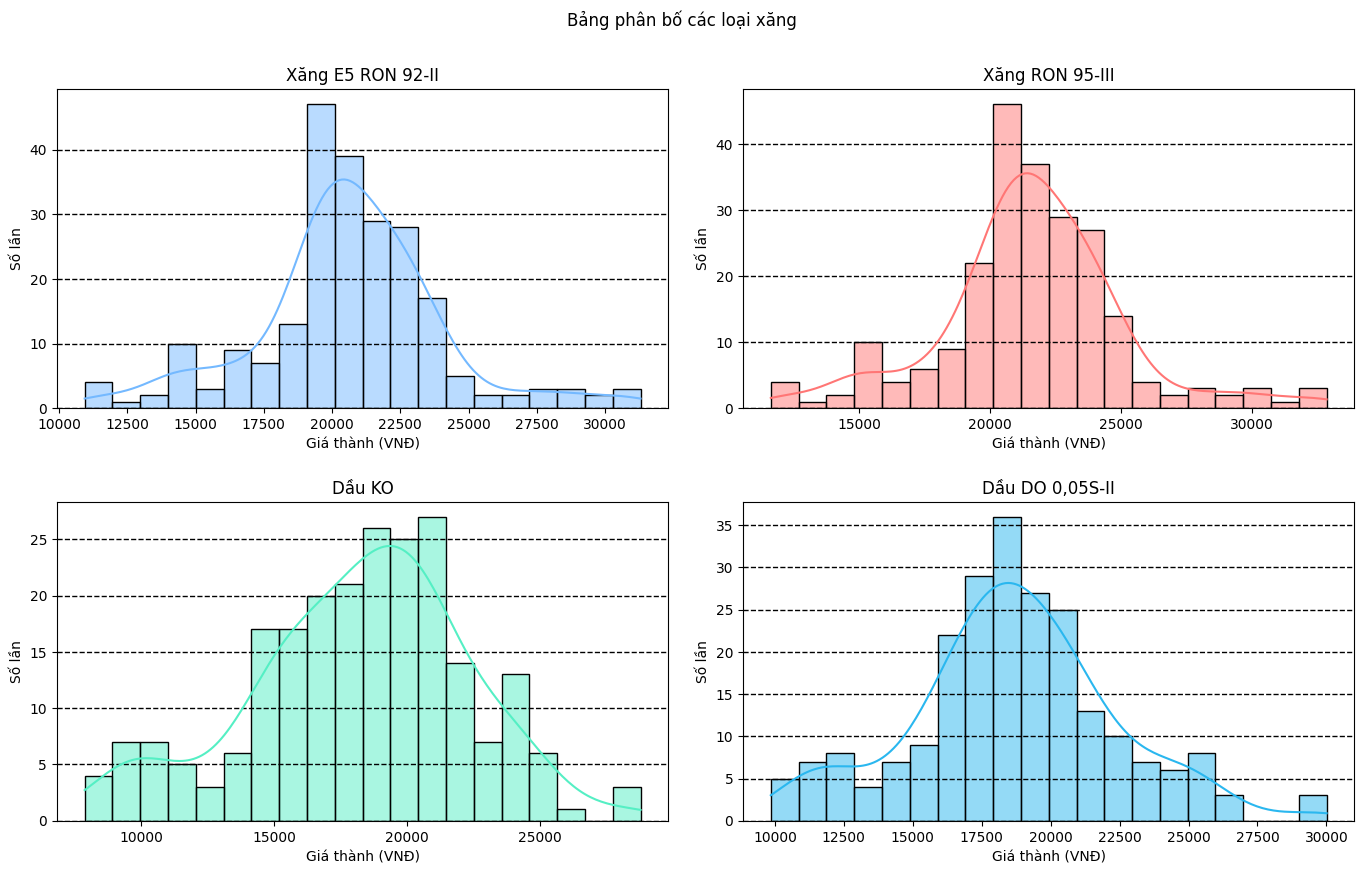

In [ ]:
# phân bố giá xăng dầu
plt.figure(figsize=(14,9))
plt.suptitle('Bảng phân bố các loại xăng')
color_list = ['#74b9ff','#ff7675','#55efc4','#2ab7ef','#d82aef','#efc42a','#b4ef2a']
for i, a in enumerate(oil_column_name):
  axes = plt.subplot(2,2,i+1)
  sns.histplot(df[a], color=color_list[i], ax = axes, bins = 20,kde=True)
  axes.set_xlabel('Giá thành (VNĐ)')
  axes.set_ylabel('Số lần')
  axes.set_title(a, size = 12)
  axes.grid(color = 'black', linestyle = '--', linewidth = 1, axis = 'y')
plt.tight_layout(pad = 2.00)
plt.show()

### 2.3 Đánh giá Outlier

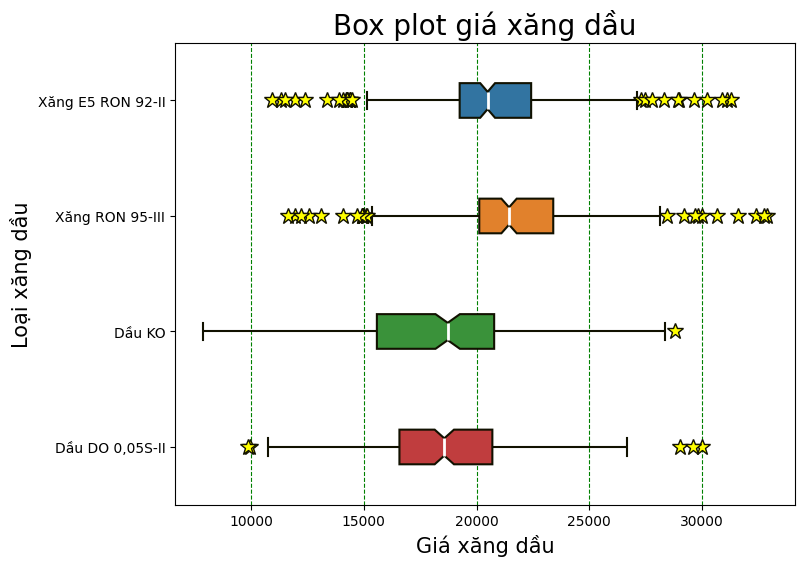

In [ ]:
# box plot
plt.figure(figsize=(8,6), dpi = 100)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.8)
sns.boxplot(data= df[oil_column_name],orient='y', width = .3, linecolor='#110',
            linewidth=1.5,fliersize=10,medianprops=dict(color = "white", linewidth = 2),
            flierprops= dict(marker='*', markerfacecolor='yellow', markersize=12),notch=True)
plt.ylabel('Loại xăng dầu', size=15)
plt.xlabel('Giá xăng dầu',size=15)
plt.title('Box plot giá xăng dầu',size=20)
plt.show()

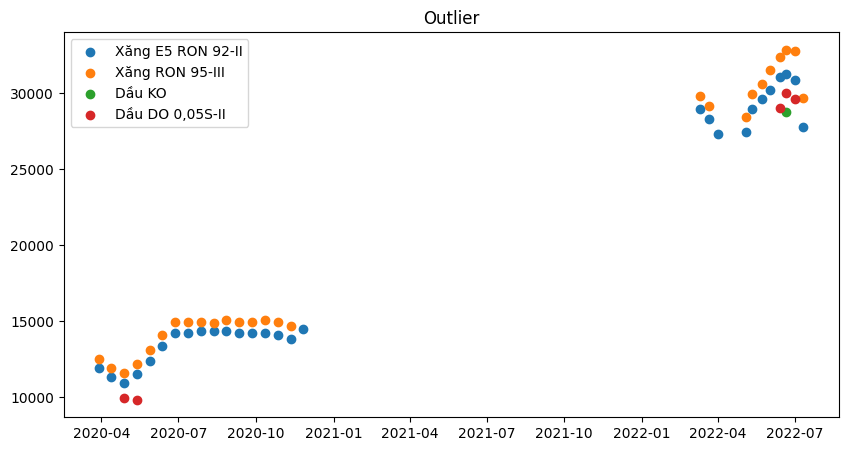

In [ ]:
# Outlier cho của xăng oil_column_name
plt.figure(figsize=(10,5))
for i, a in enumerate(oil_column_name):
  Q1 = df[a].quantile(0.25)
  Q3 = df[a].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_outliers = df[(df[a] < lower_bound) | (df[a] > upper_bound)][['Date',a]]
  plt.scatter(df_outliers['Date'],df_outliers[a], label = a)
plt.legend()
plt.title('Outlier')
plt.show()

✅ Giá 2 loại xăng là RON 95-III và E5 RON 92-II phân bố chủ yếu ở khoản giá từ 20000 VNĐ - 25000 VNĐ là chủ yếu

      ⏩ Do các chính sách điều chỉnh giá của Nhà nước Việt Nam vào 2 loại xăng phục vụ thiết yếu này.
      
        Quỹ bình ổn giá xăng dầu trước thời điểm điều hành giá xăng dầu lúc 15g00 ngày 19/06/2025 là -138,42 tỷ đồng.
        NOTE: Theo Báo cáo quỹ bình ổn giá xăng dầu ngày 19/06/2025 - PVoil

✅ Giá xăng dầu có những điểm Outlier ở ngưỡng thấp nằm ở vào thời gian từ khoảng tháng 3-4/2025 đến tháng 10-12/2020 (khoảng giá 15000 VNĐ). Những điểm nằm ở ngưỡng cao vào tháng 2/2022 - 7/2022 (khoảng giá trên 32000 VNĐ):

      ⏩ Giá xăng dầu có mức biến động mạnh như vậy:
        

        ▶ Do dịch bệnh Covid 19 trên thế giới lây lan nhanh khiến các nước phải đóng cửa mọi người hạn chế di chuyển không được ra khỏi nhà
        ↪ nhu cầu về xăng dầu giảm mạnh kéo theo giá dầu thô trên thế giới giảm mạnh vào năm đầu 2020. Từ đó giá xăng dầu ở Việt Nam về thấp.

        NOTE: Ngày 31/3/2020, Thủ tướng Chính phủ ban hành Chỉ thị số 16/CT-TTg về thực hiện các biện pháp cấp bách phòng, chống dịch COVID-19.
        Thực hiện cách ly toàn xã hội trong vòng 15 ngày kể từ 0 giờ ngày 1/4/2020 trên phạm vi toàn quốc

        ▶ Dịch bệnh Covid 19 năm 2022 được kiểm soát
        ↪ các nước mở cửa trở lại dẫn để nhu cầu xăng dầu cho vận chuyển tăng cao, cùng với sự đứt gãy trong chuỗi cung ứng trên thới giới
        ↪ giá dầu thô tăng cao ↪ giá xăng dầu trong nước tăng cao.

        NOTE: Ngày 1 tháng 10, sau gần 3 tháng áp dụng thực hiện chính sách “3 tại chỗ” (sản xuất, cách ly, ăn nghỉ tại chỗ). Các hoạt động công cộng, sản xuất không cần cách ly nhiều.
        
        ▶ Chiến sự giữa Nga-Ukaraine
        Đến tháng 4/2022 xung đột Nga-Ukaraine nổ ra căng làm tính hình giá dầu thô tồi tệ hơn. (100$/thùng vào 3/2022)
        ↪ Đẩy giá xăng dầu lên cao nhất vào tháng 7/2022.

        NOTE:
          - Nga là nước xuất khẩu dầu thô lớn thứ hai thế giới, với hệ thống đường ống Druzhba nối thẳng sang Trung Âu.
          - Ukraine sở hữu mạng cảng Biển Đen. Nơi mà 13% dầu mỏ vận chuyển bằng đường biển tới Địa Trung Hải, châu Âu và Bắc Mỹ của toàn cầu phải đi qua.
          Gián đoạn tại đây gây nên làn sóng giá dầu tăng cao.

## <font color ='red'> 3. Đánh giá tỉ trọng xuất-nhập khẩu dầu 2019-2021

In [ ]:
df_export_vietnam = df_oil_trade[(df_oil_trade['Country'] == 'Vietnam') & (df_oil_trade['Action'] == 'Export')]
df_import_vietnam = df_oil_trade[(df_oil_trade['Country'] == 'Vietnam') & (df_oil_trade['Action'] == 'Import')]

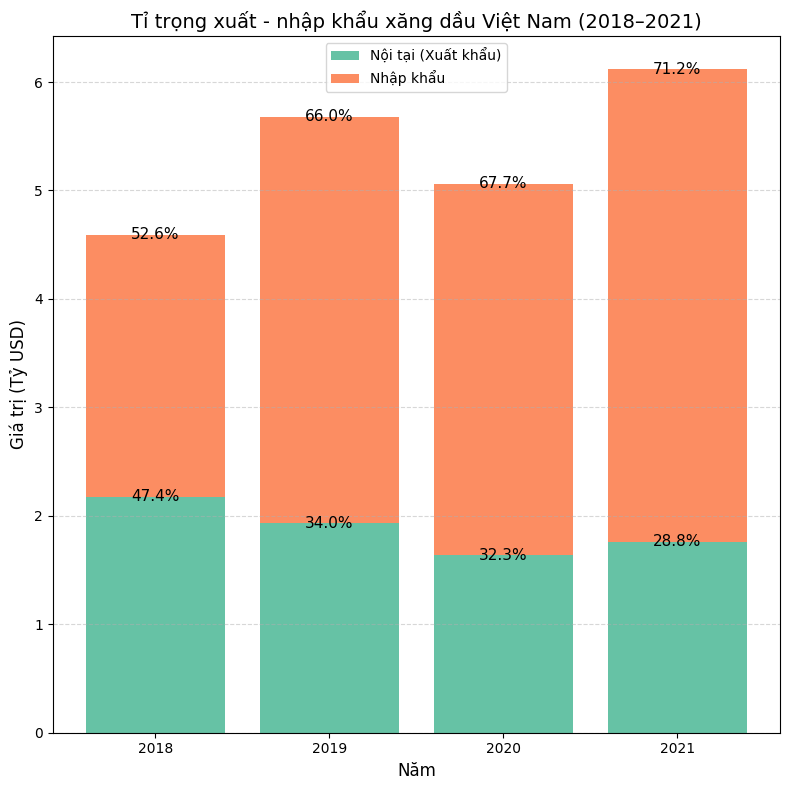

In [ ]:
# Danh sách năm
years_trade_oil = [2018, 2019, 2020, 2021]
# Tính tỉ trọng (theo phần trăm) cho từng năm
export_vietnam = []
import_vietnam = []
ratio_year = []

for yr in years_trade_oil:
    exp_val = df_export_vietnam[df_export_vietnam['Year'].dt.year == yr]['Trade Value'].item()
    imp_val = df_import_vietnam[df_import_vietnam['Year'].dt.year == yr]['Trade Value'].item()
    export_vietnam.append(round(exp_val/(10**9),3))
    import_vietnam.append(round(imp_val/(10**9),3))
    ratio_year.append(round((exp_val / (exp_val + imp_val)) * 100, 2))

# Vẽ stacked column chart
fig, ax = plt.subplots(figsize=(8, 8))

# Cột cho xuất khẩu (Nội tại)
ax.bar(years_trade_oil, export_vietnam,
       label='Nội tại (Xuất khẩu)',
       color='#66c2a5')

# Cột cho nhập khẩu, chồng lên xuất khẩu
ax.bar(years_trade_oil, import_vietnam,
       label='Nhập khẩu',
       bottom=export_vietnam,
       color='#fc8d62')

# Annotation: hiển thị tỉ trọng ngay trên cột
for i, yr in enumerate(years_trade_oil):
    ax.text(yr, export_vietnam[i],
            f"{ratio_year[i]:.1f}%",
            ha='center', va='center', color='black', fontsize=11)
    ax.text(yr, export_vietnam[i] + import_vietnam[i],
            f"{100-ratio_year[i]:.1f}%",
            ha='center', va='center', color='black', fontsize=11)

# Các thiết lập khác
ax.set_title('Tỉ trọng xuất - nhập khẩu xăng dầu Việt Nam (2018–2021)', fontsize=14)
ax.set_xlabel('Năm', fontsize=12)
ax.set_ylabel('Giá trị (Tỷ USD)', fontsize=12)
ax.set_xticks(years_trade_oil)
ax.set_xticklabels(years_trade_oil)
ax.legend(loc='upper center')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Thấy rằng tỷ trọng xuất- nhập của Việt Nam thiên về nhập khẩu và có chiều hướng tăng qua từng năm -> giá xăng dầu phụ thuộc vào tình hình giá dầu thế giới.

⭐ Bối cảnh:

  - Nhu cầu tiêu thụ tăng nhanh sau dịch – Kinh tế hồi phục từ nửa cuối 2020, đặc biệt là quý II–III/2021, kéo theo nhu cầu xăng dầu cho vận tải, công nghiệp và xây dựng bùng nổ trở lại. Tiêu thụ xăng dầu nội địa tăng cao.

  - Nhà máy Lọc dầu Dung Quất và Nghi Sơn (Thanh Hóa) mới chỉ đáp ứng một phần nhu cầu khoản↪ cung nội địa nhỏ so với nhu cầu ngày càng lớn.

  - Giá dầu thô và xăng dầu thế giới tăng kỷ lục năm 2021 – Đẩy giá nhập khẩu bình quân năm 2021 đạt 593 USD/tấn, tăng 191 USD/tấn so với cùng kỳ năm trước, đẩy kim ngạch nhập khẩu xăng dầu vọt lên 4,14 tỷ USD, tăng 24,6% so với 2020 dù khối lượng giảm 15,5%.



Năm 2018 xuất khẩu:


,Continent,Country,Trade Value,Year,Action
488,Asia,Saudi Arabia,1.658830e+11,2018-01-01,Export
526,Europe,Russia,1.331150e+11,2018-01-01,Export
472,Asia,Iraq,8.223727e+10,2018-01-01,Export
537,North America,Canada,6.667683e+10,2018-01-01,Export
461,Asia,United Arab Emirates,5.802676e+10,2018-01-01,Export




Năm 2019 xuất khẩu:


,Continent,Country,Trade Value,Year,Action
349,Asia,Saudi Arabia,1.493090e+11,2019-01-01,Export
390,Europe,Russia,1.231360e+11,2019-01-01,Export
332,Asia,Iraq,7.472220e+10,2019-01-01,Export
400,North America,Canada,6.777533e+10,2019-01-01,Export
411,North America,United States,6.180260e+10,2019-01-01,Export




Năm 2020 xuất khẩu:


,Continent,Country,Trade Value,Year,Action
206,Asia,Saudi Arabia,9.739653e+10,2020-01-01,Export
246,Europe,Russia,7.442380e+10,2020-01-01,Export
267,North America,United States,5.220654e+10,2020-01-01,Export
256,North America,Canada,4.717733e+10,2020-01-01,Export
190,Asia,Iraq,4.540363e+10,2020-01-01,Export




Năm 2021 xuất khẩu:


,Continent,Country,Trade Value,Year,Action
67,Asia,Saudi Arabia,1.376140e+11,2021-01-01,Export
110,Europe,Russia,1.126830e+11,2021-01-01,Export
119,North America,Canada,8.122881e+10,2021-01-01,Export
49,Asia,Iraq,7.204987e+10,2021-01-01,Export
131,North America,United States,6.763051e+10,2021-01-01,Export


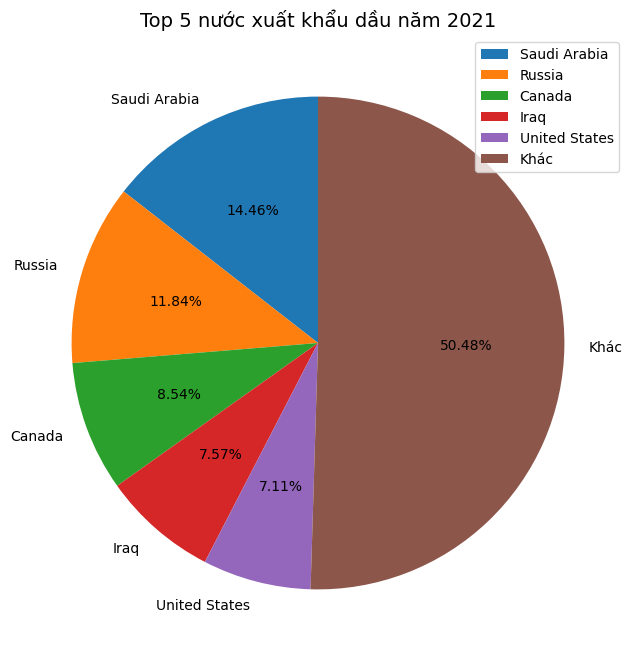

In [ ]:
# Top 5 nước xuất khẩu dầu từ năm 2018-2021

for i, yr in enumerate(years_trade_oil):
  df_oil_top5_export = df_oil_trade[(df_oil_trade['Action'] == 'Export') & (df_oil_trade['Year'].dt.year == yr)].sort_values(by = 'Trade Value', ascending= False)
  print(f'Năm {yr} xuất khẩu:')
  display(df_oil_top5_export.head(5))
  print(end='\n\n')

country_list = df_oil_top5_export['Country'].head(5).tolist()
df_oil_trade_export = df_oil_trade[df_oil_trade['Action'] == 'Export']
plt.subplots(figsize=(8, 8))

labels = country_list
sizes = []
for i, a in enumerate(country_list):
  export_country = df_oil_trade_export[(df_oil_trade_export['Country'] == a) & (df_oil_trade_export['Year'].dt.year == 2021)]['Trade Value'].sum()
  ratio_country_export = export_country/(df_oil_trade_export[(df_oil_trade_export['Year'].dt.year == 2021)]['Trade Value'].sum())*100
  sizes.append(round(ratio_country_export,2))
orther_export = 100 - sum(sizes)
labels.append('Khác')
sizes.append(orther_export)
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Top 5 nước xuất khẩu dầu năm 2021', fontsize=14)
plt.legend()
plt.show()

▶ Nga là nước xuất khẩu dầu đúng thứ hai thế giới năm 2018-2021. Tỉ trọng xuất khẩu dầu cao chiếm 11.84% xuất khẩu của thế giới năm 2021 ↪ Giá dầu thô thế giới tăng cao khi chiến sự Nga-Ukraine diễn ra vào tháng 4-2022.
    
      ❗ Giá xăng dầu việt Nam tăng cao chạm đỉnh (Giá xăng RON 95-III: 32870 VNĐ) vào thời điểm đó.

## <font color = 'red'> 4. Đánh giá tổng quá và đưa nhận định cá nhân

⭐ Kết luận:

  ▶ Thấy rằng tình hình giá xăng dầu ở Việt Nam còn phụ thuộc nhiều vào giá dầu thế giới.
  
⭐ Nhận định cá nhân:

  - Bối cảnh: Trong hiện trạng khu vực xuất khẩu dầu lớn đang ảnh hưởng bởi chiến sự và việc áp dụng lệnh trừng phạt của các nước lớn: Mỹ, liên minh châu Âu lên các khu vực này còn đẩy giá dầu thế giới tăng.
      
  ⬇ Việt Nam nên:

    1. Tăng hay hỗ trợ đầu tư vào xây dựng thêm nhà máy lọc dầu ( nhà máy lọc dầu Dung Quất hiện tại vẫn chưa đáp ứng đủ nhu cầu trong nước). Tăng tính tự chủ và đảm bảo an ninh quốc phòng.

    2. Chuyển đổi xe xăng thành xe điện giảm phụ thuộc quá nhiều vào xăng (Theo thống kê của World Atlas năm 2023 cho thấy Việt Nam là nước xếp thứ 2 thế giới về tỷ lệ hộ gia đình dùng xe máy (86%)).

    3. Đây mạnh xây dựng vận tải hành khách công cộng (hiện đang có nhưng bước chuyển tốt tại cái thành phố lớn Hà Nội và Hồ Chí Minh: đầu tư hệ thống tàu điện, xe bus chạy điện,...)

⭐ Thách thức và lợi thế:
  
1. Thách thức:

  - Đầu tư vào xe điện và xây dựng có triển khai lâu và lâu hiệu quả.
  
  - Người dân khó thay đổi thói quen di chuyển.

2. Lợi thế:

  - Do có tỉ trọng sản xuất dầu trong nước nhỏ nên khi chuyển đổi qua nhiên liệu mới dễ hơn.

  - Lợi thế cho việc đầu tư cung cấp các nguồn nhiên liệu mới thay thế xăng dầu.